### 와인 데이터를 통한 와인 종류에 따른 특징 분석   
    - 와인의 종류에 따른 밀도 차이 분석

In [1]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import bartlett
import koreanize_matplotlib

In [2]:
## 데이터 전처리
# 데이터 불러오기
file_name='./data/winequality-red.csv'
df_red=pd.read_csv(file_name)

file_name2='./data/winequality-white.csv'
df_white=pd.read_csv(file_name2)
# 색깔 구분자 생성 및 결합

df_red['color']=0
df_white['color']=1
df_mix=pd.concat([df_white, df_red], axis=0)
df_mix= df_mix.reset_index(drop=True)
print(df_mix.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


In [3]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  color                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  color                 4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


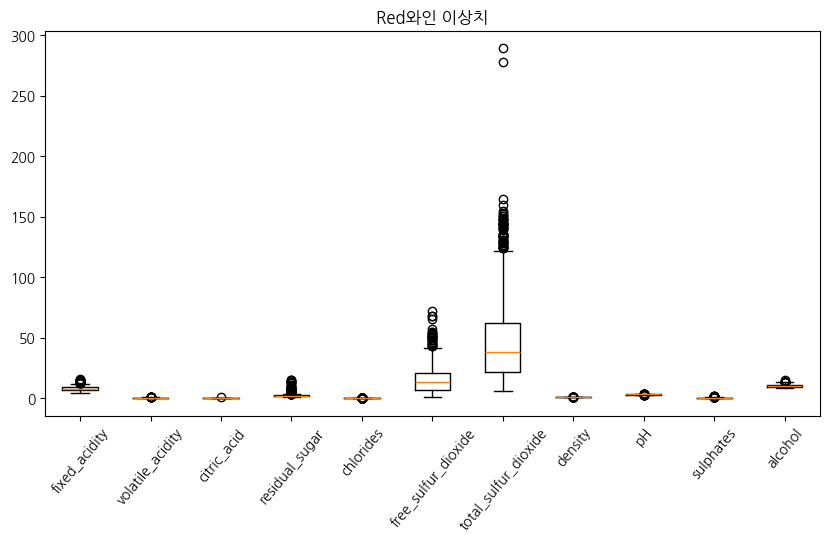

In [5]:
# 이상치 확인 -> Red와인
plt.figure(figsize = (10, 5))
plt.boxplot(df_red.iloc[:, :-2])
plt.xticks(np.arange(1, 12), df_red.columns[:-2], rotation = 50)
plt.title('Red와인 이상치')
plt.show()

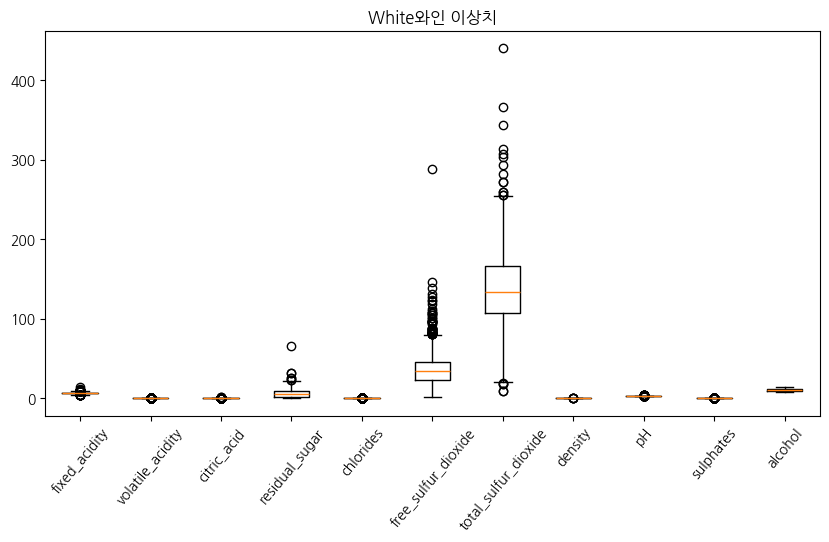

In [6]:
# 이상치 확인 -> white 와인

plt.figure(figsize = (10, 5))
plt.boxplot(df_white.iloc[:, :-2])
plt.xticks(np.arange(1, 12), df_white.columns[:-2], rotation = 50)
plt.title('White와인 이상치')
plt.show()

In [7]:
# 이상치 처리
def del_outlier(data, col_filter):
    for i in col_filter:
        # iqr 계산
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3 - q1
        
        # 하한선, 상한선 지정
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
    
        # 이상치 제거
        data = data[(data[i]>= lower_limit) & (data[i]<= upper_limit)]
        data.reset_index(inplace=True, drop=True)
    return data
    

In [8]:
col_list= df_red.columns[:-2]
print(col_list)
red_clean= del_outlier(df_red, col_list)
red_clean.info()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1135 non-null   float64
 1   volatile_acidity      1135 non-null   float64
 2   citric_acid           1135 non-null   float64
 3   residual_sugar        1135 non-null   float64
 4   chlorides             1135 non-null   float64
 5   free_sulfur_dioxide   1135 non-null   float64
 6   total_sulfur_dioxide  1135 non-null   float64
 7   density               1135 non-null   float64
 8   pH                    1135 non-null   float64
 9   sulphates             1135 non-null   float64
 10  alcohol               1135 non-null   float64
 11  quality   

In [9]:
white_clean= del_outlier(df_white, col_list)
white_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3973 non-null   float64
 1   volatile_acidity      3973 non-null   float64
 2   citric_acid           3973 non-null   float64
 3   residual_sugar        3973 non-null   float64
 4   chlorides             3973 non-null   float64
 5   free_sulfur_dioxide   3973 non-null   float64
 6   total_sulfur_dioxide  3973 non-null   float64
 7   density               3973 non-null   float64
 8   pH                    3973 non-null   float64
 9   sulphates             3973 non-null   float64
 10  alcohol               3973 non-null   float64
 11  quality               3973 non-null   int64  
 12  color                 3973 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 403.6 KB


#### 30%이상의 데이터가 제거되고, 원 데이터가 직접 관측을 바탕으로 만들어졌기 때문에 이상치를 따로 처리하지 않는다.

In [10]:
# 상관관계 확인
df_mix.corr()
## -> 밀도가 색갈에 뚜렷한 영향을 주는것 처럼 보인지는 않는다.. 정말로 그럴까?
df_mix.corr().to_csv('./밀도_상관관계.csv', encoding='utf-8-sig')

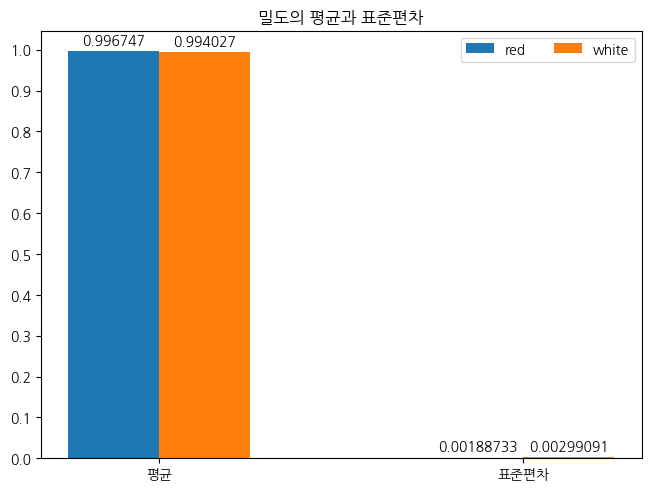

In [111]:
# 와인별 밀도의 평균과 표준편차 시각화
search=df_mix['color']==0
# 평균 데이터 삽입
red=df_mix[search]['density'].mean()
white=df_mix[~search]['density'].mean()

# 표준편차 데이터 삽입
red2=df_mix[search]['density'].std()
white2=df_mix[~search]['density'].std()

# x축 데이터
wines= ('평균', '표준편차')
# y축 데이터
data={
    'red': (red, red2),
    'white': (white, white2)
}
x=np.arange(2)
width=0.25
multiplier=0

fig, ax= plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset= width * multiplier
    rects= ax.bar(x+ offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier+=1
ax.set_title('밀도의 평균과 표준편차')
ax.set_xticks(x + width/2, wines)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.legend(loc='upper right', ncols=2)
plt.show()

# 수치 차이가 너무 작아 유의미한 차이가 있는지 알 수 없음 -> 검정을 통해 차이 분석

In [112]:
# 평균 유의성 검증을 위한 등분산성 검증
# ++표본이 충분히 크기 때문에 정규정을 만족하고 독립성또한 만족한다고 가정

# H0: 두 집단의 분산의 차이가 없다.
# H1: 두 집단의 분산의 차이가 있다.
# 유의수준: 0.05 

static, p_value = bartlett(df_red['density'], df_white['density'])
print(f"검정 통계량: {static}\nP값: {p_value}")


검정 통계량: 430.5766981952509
P값: 1.2172223684463467e-95


- p값이 유의수준보다 작기 때문에 귀무가설을 기각한다. 즉, 두 집단간 분산의 차이가 있는것으로 판단한다.

통계량: 42.70851107543416
p값: 0.0


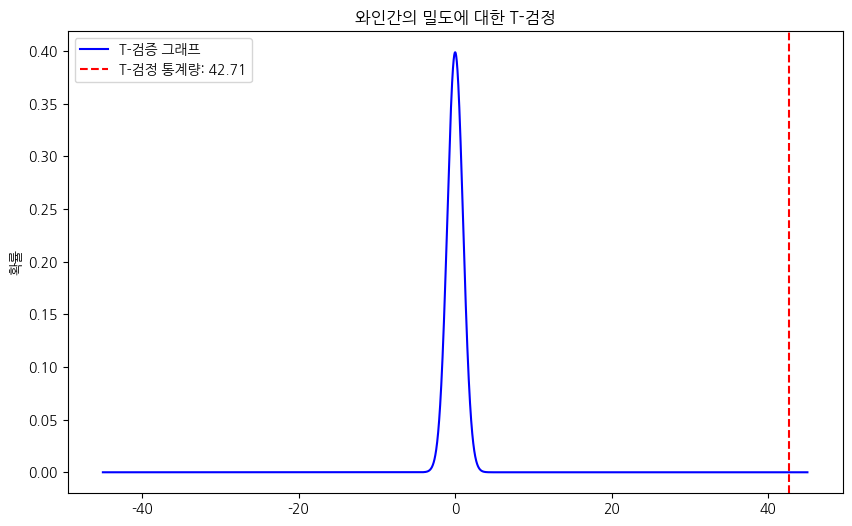

In [113]:
# 두 집단이 이분산일 경우 t-검증
# H0: 두 집단의 평균에 차이가 없다.
# H1: 두 집단의 평균에 차이가 있다.
t_stat, p_value= stats.ttest_ind(df_red['density'], df_white['density'], equal_var = False)
print(f'통계량: {t_stat}\np값: {p_value}')

# 시각화
df=1000
x=np.linspace(-45, 45, 5000)
y= stats.t.pdf(x,df)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'b-', label='T-검증 그래프')
plt.axvline(x=t_stat, color='r', linestyle='--', label=f'T-검정 통계량: {t_stat:.2f}')
plt.title('와인간의 밀도에 대한 T-검정')

plt.ylabel('확률')
plt.legend()

- 검정 통계량이 42.71로 유의확률이 0에 가깝기 때문에 귀무가설을 기각한다. 즉, 두 집단의 평균이 같지 않다고 판단한다.

In [114]:
df_mix.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


In [115]:
## 이때, white와인의 밀도가 red와인의 밀도보다 더 낮다는 것을 알 수 있다.